# Bibliotecas

In [1]:
# Análise Exploratória
import pandas as pd
import numpy as np
import locale
import missingno as msno

# Configurações do Pandas
pd.options.display.max_columns = 300
pd.options.display.max_rows = 50

# Configuração de localização
locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')  # Seta os meses, horas e etc para br

# Bibliotecas Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando Base & Padronização das Colunas

In [2]:
application_df = pd.read_csv(
    r"G:\Meu Drive\Dissertacao\Data\Raw\StepWise Aplication Data.csv",
    parse_dates = ['Data'],
    dtype = {
        'OTBX_ScoreFragilidadeSocial' : 'Int64',
        'OTBX_atributos_boxcsvar011_score' : 'Int64',
        'OTBX_atributos_bk_302_009_indicador_upa_cep_pesquisado' : str,
        'OTBX_atributos_bk_303_001_indicador_eds' : str,
        'OTBX_atributos_bk_201_001_situacao_especial' : str,
        'OTBX_IsMEI' : str,
        'OTBX_atributos_bk_201_001_nome_pais' : str
    }
)

application_df = application_df.loc[application_df['Data'] >= '07/2020', :]
application_df = application_df.reset_index(drop = True)

application_df.head(2)

,Data,Inadimplencia,Amostra,OTBX_atributos_boxcsvar011_score,OTBX_ScoreFragilidadeSocial,OTBX_atributos_bk_201_001_capital_social,OTBX_atributos_bk_201_001_tempo_meses_data_ref,OTBX_atributos_bk_201_002_qtde_cnpj_opcao_simples_excluido,OTBX_atributos_bk_201_002_qtde_cnpj_opcao_simples_optante,OTBX_atributos_bk_201_002_qtde_cnpj_porte_demais,OTBX_atributos_bk_201_002_qtde_cnpj_porte_me,OTBX_atributos_bk_202_001_pct_81_n_servicos_para_edificios_e_atividades_paisagisticas,OTBX_atributos_bk_202_001_pct_cnae_secundarios,OTBX_atributos_bk_202_001_pct_h_transporte_armazenagem_e_correio,OTBX_atributos_bk_202_001_qtde_32_c_fabricacao_de_produtos_diversos,OTBX_atributos_bk_202_001_qtde_77_n_alugueis_nao_imobiliarios_e_gestao_de_ativos_intangiveis_nao_financeiros,OTBX_atributos_bk_202_001_qtde_total_cnae,OTBX_atributos_bk_203_002_qtde_qualificacao_societaria_cod_049,OTBX_atributos_bk_203_002_qtde_relacoes_societarias,OTBX_TempoDiasEntradaMedia,OTBX_atributos_bk_302_001_distancia_minima,OTBX_atributos_bk_302_001_qtde_hospital_3_km,OTBX_atributos_bk_302_001_qtde_hospital_5_km,OTBX_atributos_bk_302_002_distancia_minima,OTBX_DistanciaMunicioClasseA,OTBX_atributos_bk_302_002_distancia_minima_classe_b,OTBX_atributos_bk_302_003_distancia_minima,OTBX_atributos_bk_302_004_distancia_minima,OTBX_atributos_bk_302_004_qtde_nasf_3_km,OTBX_atributos_bk_302_005_qtde_cnes_1_km,OTBX_atributos_bk_302_005_qtde_cnes_5_km,OTBX_atributos_bk_302_006_distancia_minima,OTBX_atributos_bk_302_007_indice_efetividade_classe_a,OTBX_atributos_bk_302_007_score_classe_cep_pesquisado,OTBX_atributos_bk_302_009_indicador_upa_cep_pesquisado,OTBX_atributos_bk_302_009_porte_upa,OTBX_atributos_bk_302_010_qtde_score,OTBX_atributos_bk_302_011_qtde_farmacia_popular_3_km,OTBX_atributos_bk_302_011_qtde_farmacia_popular_5_km,OTBX_atributos_bk_302_012_distancia_minima,OTBX_atributos_bk_302_012_distancia_minima_classe_a,OTBX_atributos_bk_302_012_qtde_unidades_classe_b,OTBX_atributos_bk_302_013_distancia_minima,OTBX_atributos_bk_302_013_qtde_obitos,OTBX_atributos_bk_303_001_distancia_minima,OTBX_atributos_bk_303_001_indicador_eds,OTBX_atributos_bk_303_001_qtde_eds_1_km,OTBX_atributos_bk_303_001_qtde_eds_2_km,OTBX_atributos_bk_303_001_qtde_eds_3_km,OTBX_atributos_bk_303_001_qtde_eds_5_km,OTBX_atributos_bk_303_002_alta_grau,OTBX_atributos_bk_303_002_distancia_minima,OTBX_atributos_bk_303_002_distancia_minima_alta,OTBX_atributos_bk_303_002_grau_med_severidade_5_km,OTBX_atributos_bk_303_002_odds_1_km,OTBX_atributos_bk_303_002_odds_3_km,OTBX_atributos_bk_303_002_qtde_edscs_alta_1_km,OTBX_atributos_bk_303_002_qtde_edscs_alta_3_km,OTBX_atributos_bk_303_002_qtde_edscs_alta_5_km,OTBX_atributos_bk_303_002_qtde_edscs_altissima_3_km,OTBX_atributos_bk_303_003_distancia_minima,OTBX_atributos_bk_303_003_qtde_efs_1_km,OTBX_atributos_bk_303_003_qtde_efs_2_km,OTBX_atributos_bk_303_004_distancia_minima,OTBX_atributos_bk_303_004_qtde_eap_5_km,OTBX_atributos_bk_303_005_chefe_reais,OTBX_atributos_bk_303_005_media_reais,OTBX_atributos_bk_303_005_per_capita_reais,OTBX_atributos_bk_303_005_qtde_chefe,OTBX_atributos_bk_303_005_qtde_media,OTBX_atributos_bk_303_006_distancia_minima,OTBX_atributos_bk_303_006_distancia_minima_classe_ab,OTBX_atributos_bk_303_006_pib_per_capita_classe_ab,OTBX_atributos_bk_303_007_qtde_faixa_3_renda,OTBX_atributos_bk_303_008_pct_0_ate_1_quarto_salario_min,OTBX_Pct_0_ate_1_quarto_salario_min,OTBX_atributos_bk_303_008_pct_meio_ate_1_salario_min,OTBX_atributos_bk_303_009_num_comodos,OTBX_atributos_bk_303_009_num_dormitorios,OTBX_atributos_bk_303_009_pct_abastecimento_agua_canalizacao_total,OTBX_atributos_bk_303_009_pct_condicao_ocupacao_alugado,OTBX_atributos_bk_303_009_pct_condicao_ocupacao_outro,OTBX_atributos_bk_303_009_pct_condicao_ocupacao_proprio_pagando,OTBX_atributos_bk_303_009_pct_dom_part_alugado,OTBX_atributos_bk_303_009_pct_dom_part_apartamento,OTBX_atributos_bk_303_009_pct_dom_part_banheiros_exc,OTBX_atributos_bk_303_009_pct_dom_part_casa,OTBX_atributos_bk_303_009_pct_dom_part

In [3]:
renomear_colunas = {
    'Data': 'data',
    'Inadimplencia' : 'inadimplencia',
    'Amostra' : 'amostra',
    'OTBX_atributos_boxcsvar011_score' : 'score_credito',
    'OTBX_atributos_bk_201_001_aglomerado_uf' : 'uf', 
    'OTBX_atributos_bk_201_001_capital_social' : 'capital_social',
    'OTBX_atributos_bk_303_008_pct_0_ate_1_quarto_salario_min' : 'cep_consultado_pct_0_ate_1_quarto_salario_minimo', 
    'OTBX_atributos_bk_201_001_descricao_cnae_secao' : 'cnae_secao', 
    'OTBX_atributos_bk_201_001_tempo_meses_data_ref' : 'tempo_meses_data_ref',
    'OTBX_atributos_bk_201_002_matriz_tempo_meses_data_ref' : 'tempo_meses_de_existencia_da_matriz_ate_data_referencia', 
    'OTBX_atributos.faturamento_presumido' : 'faturamento_presumido',
    'OTBX_atributos_bk_303_009_pct_existencia_radio_sim' : 'pct_possui_radio', 
    'OTBX_Pct_trabalhadores_sem_carteira_assinada' : 'pct_trabalhadores_sem_carteira_assinada', 
    'OTBX_atributos_bk_304_003_pct_cnpj_ativa_opcao_mei' : 'pct_cnpj_ativa_opcao_mei_no_cep', 
    'OTBX_atributos_bk_303_009_pct_abastecimento_agua_canalizacao_total' : 'pct_abastecimento_agua_canalizacao_total', 
    'OTBX_atributos_bk_303_009_pct_domic_adequado' : 'pct_domicilio_adequado', 
    'OTBX_Pct_esgoto_ceu_aberto' : 'pct_esgoto_ceu_aberto', 
    'OTBX_atributos_bk_304_001_pct_cnpj_porte_epp' : 'pct_cnpj_porte_epp', 
    'OTBX_atributos_bk_303_003_qtde_efs_2_km' : 'qtde_enderecos_favorecidos_socialmente_2km', 
    'OTBX_atributos_bk_303_001_qtde_eds_2_km' : 'qtde_enderecos_desfavorecidos_socialmente_2km', 
    'OTBX_atributos_bk_303_009_pct_existencia_moto_nao' : 'pct_existencia_moto', 
    'OTBX_atributos_bk_302_001_qtde_hospital_3_km' : 'qtde_hospital_3km', 
    'OTBX_atributos_bk_202_001_qtde_total_cnae' : 'qtde_total_cnae', 
    'OTBX_ScoreFragilidadeSocial' : 'score_fragilidade_social', 
    'OTBX_atributos_bk_303_011_pct_arborizacao' : 'pct_arborizacao',  
    'OTBX_atributos_bk_303_010_pct_tempo_gasto_deslocamento_trabalho_05_min' : 'pct_tempo_gasto_deslocamento_trabalho_0_5_min', 
    'OTBX_atributos_bk_303_010_pct_tempo_gasto_deslocamento_trabalho_06_30_min' : 'pct_tempo_gasto_deslocamento_trabalho_6_30_min', 
    'OTBX_atributos_bk_303_010_pct_tempo_gasto_deslocamento_trabalho_31_60_min' : 'pct_tempo_gasto_deslocamento_trabalho_31_60_min', 
    'OTBX_atributos_bk_303_010_pct_tempo_gasto_deslocamento_trabalho_mais_120_min' : 'pct_tempo_gasto_deslocamento_trabalho_mais_120_min',
    'OTBX_atributos_bk_303_005_per_capita_reais' : 'per_capita_reais', 
    'OTBX_atributos_bk_303_009_pct_existencia_geladeira_sim' : 'pct_existencia_geladeira', 
    'OTBX_atributos_bk_303_009_valor_aluguel_reais_igpm' : 'valor_aluguel_reais_igpm', 
    'OTBX_atributos_bk_303_010_pct_ocupada_sim' : 'pct_regiao_ocupada_sim', 
    'OTBX_Qualificacao_Societaria_SocioADM' : 'qnt_socios_administradores', 
    'OTBX_IsMEI' : 'is_mei', 
    'OTBX_atributos_bk_303_010_pct_desempregados_em_busca_trabalho_sim' : 'pct_desempregados_em_busca_trabalho', 
    'OTBX_NaturezaJuridica' : 'natureza_juridica', 
    'OTBX_Porte' : 'porte',
    'OTBX_cnaeSecao' : 'cnae_secao', 
    'OTBX_PctPossuiAutomovel' : 'pct_possui_automovel', 
    'OTBX_TempoDiasEntradaMedia' : 'tempo_dias_entrada_socios_media'
}

application_df.rename(columns = renomear_colunas, inplace = True)

In [4]:
colunas_selecionadas = [
    'data',
    'inadimplencia', # Indicador de inadimplencia
    'amostra',
    'score_fragilidade_social', # Informações relacionadas a Empresa ---
    'score_credito',
    'porte',
    'is_mei',
    'faturamento_presumido',
    'uf',
    'natureza_juridica',
    'cnae_secao',
    'tempo_dias_entrada_socios_media',
    'tempo_meses_de_existencia_da_matriz_ate_data_referencia',
    'qtde_total_cnae', 
    'qnt_socios_administradores',
    'valor_aluguel_reais_igpm',  # Informações relacionados ao CEP ------------------------------ 
    'per_capita_reais',
    'cep_consultado_pct_0_ate_1_quarto_salario_minimo',
    'qtde_enderecos_favorecidos_socialmente_2km',
    'qtde_enderecos_desfavorecidos_socialmente_2km',
    'qtde_hospital_3km',
    'pct_trabalhadores_sem_carteira_assinada',
    'pct_cnpj_ativa_opcao_mei_no_cep',
    'pct_abastecimento_agua_canalizacao_total',
    'pct_domicilio_adequado',
    'pct_esgoto_ceu_aberto',
    'pct_arborizacao',
    'pct_desempregados_em_busca_trabalho',
    'pct_possui_automovel',
    'pct_possui_radio',
    'pct_existencia_moto',   
    'pct_existencia_geladeira',
    'pct_regiao_ocupada_sim',
    'pct_tempo_gasto_deslocamento_trabalho_0_5_min',
    'pct_tempo_gasto_deslocamento_trabalho_6_30_min',
    'pct_tempo_gasto_deslocamento_trabalho_31_60_min',
    'pct_tempo_gasto_deslocamento_trabalho_mais_120_min'
]

application_df['pct_existencia_moto'] = application_df['pct_existencia_moto'] - 1 # A informação original vem na % de pessoas que não possuem moto, vamos converter de forma
# que ela converse melhor com as demais

application_df = application_df.loc[:, colunas_selecionadas]

application_df.head(3)

,data,inadimplencia,amostra,score_fragilidade_social,score_credito,porte,is_mei,faturamento_presumido,uf,natureza_juridica,cnae_secao,tempo_dias_entrada_socios_media,tempo_meses_de_existencia_da_matriz_ate_data_referencia,qtde_total_cnae,qnt_socios_administradores,valor_aluguel_reais_igpm,per_capita_reais,cep_consultado_pct_0_ate_1_quarto_salario_minimo,qtde_enderecos_favorecidos_socialmente_2km,qtde_enderecos_desfavorecidos_socialmente_2km,qtde_hospital_3km,pct_trabalhadores_sem_carteira_assinada,pct_cnpj_ativa_opcao_mei_no_cep,pct_abastecimento_agua_canalizacao_total,pct_domicilio_adequado,pct_esgoto_ceu_aberto,pct_arborizacao,pct_desempregados_em_busca_trabalho,pct_possui_automovel,pct_possui_radio,pct_existencia_moto,pct_existencia_geladeira,pct_regiao_ocupada_sim,pct_tempo_gasto_deslocamento_trabalho_0_5_min,pct_tempo_gasto_deslocamento_trabalho_6_30_min,pct_tempo_gasto_deslocamento_trabalho_31_60_min,pct_tempo_gasto_deslocamento_trabalho_mais_120_min
0,2021-02-10,0.0,DES,553,842,DEMAIS,False,11000000.0,SP,COOPERATIVA,"Atividades Financeiras, De Seguros E Serviços ...",982.0,590.0,1.0,0.0,972.634929,5203.00,4.829,3.0,0.0,54.0,10.606,34.43,97.275,99.53,0.00,74.79,5.450,67.505,82.600,88.727,96.855,96.284,16.017,66.450,15.801,0.000
1,2020-07-31,0.0,DES,783,142,DEMAIS,False,41500.0,MG,SOCIEDADE EMPRESARIA LIMITADA,Comércio - Reparação De Veículos Automotores E...,4107.0,343.0,15.0,1.0,436.878933,1724.25,4.817,1.0,0.0,14.0,16.518,62.99,97.021,62.51,17.17,43.41,8.718,48.369,89.787,76.305,97.021,95.267,8.681,60.069,28.356,0.231
2,2020-09-24,0.0,DES,647,647,MICRO-EMPRESA,False,420000.0,MG,EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITAD...,Indústrias De Transformação,5410.0,364.0,3.0,0.0,460.712680,1306.25,4.817,1.0,0.0,14.0,14.444,18.18,96.025,62.51,17.17,43.41,7.786,45.980,87.895,76.958,95.483,95.378,7.137,67.407,22.839,0.476


# Pré-Processamento da Base

## Reamostragem da Base de Dados

In [5]:
# Quero apenas amostras DES, OOS e OOT
application_df = application_df[application_df['amostra'].isin(['DES', 'OOS', 'OOT'])]


# Todas a informação após abril será considerada como OOT. Teremos 6 meses de amostras Out-of-time
application_df.loc[
    application_df['data'] >= pd.to_datetime('01/04/2022', format = '%d/%m/%Y'),
    'amostra'
] = 'OOT'

application_df.loc[application_df['amostra'] == 'OOS', 'amostra'] = 'DES'

C:\Users\zheag\AppData\Local\Temp\ipykernel_19516\3201037872.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nomes_xlabels)


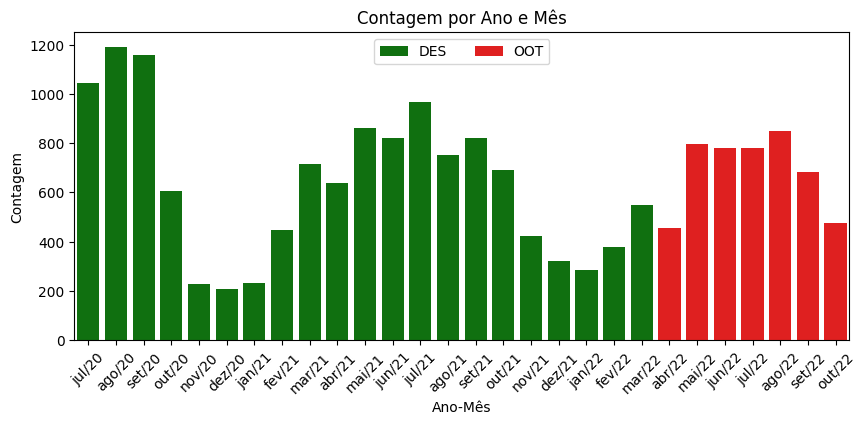

In [10]:
# Corrigir essa bagunça <----------------
application_grouped = application_df.copy()

application_grouped['ano'] = application_grouped['data'].dt.year
application_grouped['mes'] = application_grouped['data'].dt.month

application_grouped = application_grouped.groupby(['ano', 'mes', 'amostra']).size().reset_index(name = 'contagem')

# Concatenar ano e mês para o eixo X
application_grouped['ano_mes'] = application_grouped['ano'].astype(str) + '-' + application_grouped['mes'].astype(str)

dates = pd.date_range(
    start = '07/2020',
    end = '10/2022',
    freq = 'MS',
).tolist()

nomes_xlabels = [date.strftime('%b/%y') for date in dates]

plt.figure(figsize = (10, 4))

ax = sns.barplot(
    x='ano_mes', 
    y='contagem', 
    data=application_grouped,
    hue = 'amostra',
    palette = ['green', 'red'], # Definir uma paleta de cores para gráficos
    dodge = False
)

plt.xticks(rotation=45)
plt.xlabel('Ano-Mês')
plt.ylabel('Contagem')
plt.title('Contagem por Ano e Mês')
plt.legend(loc='upper center', ncol = 3)

ax.set_xticklabels(nomes_xlabels)
plt.show()

del application_grouped

## Avaliação das Categorias

## Visualização & Entendimento do Preenchimento de NA

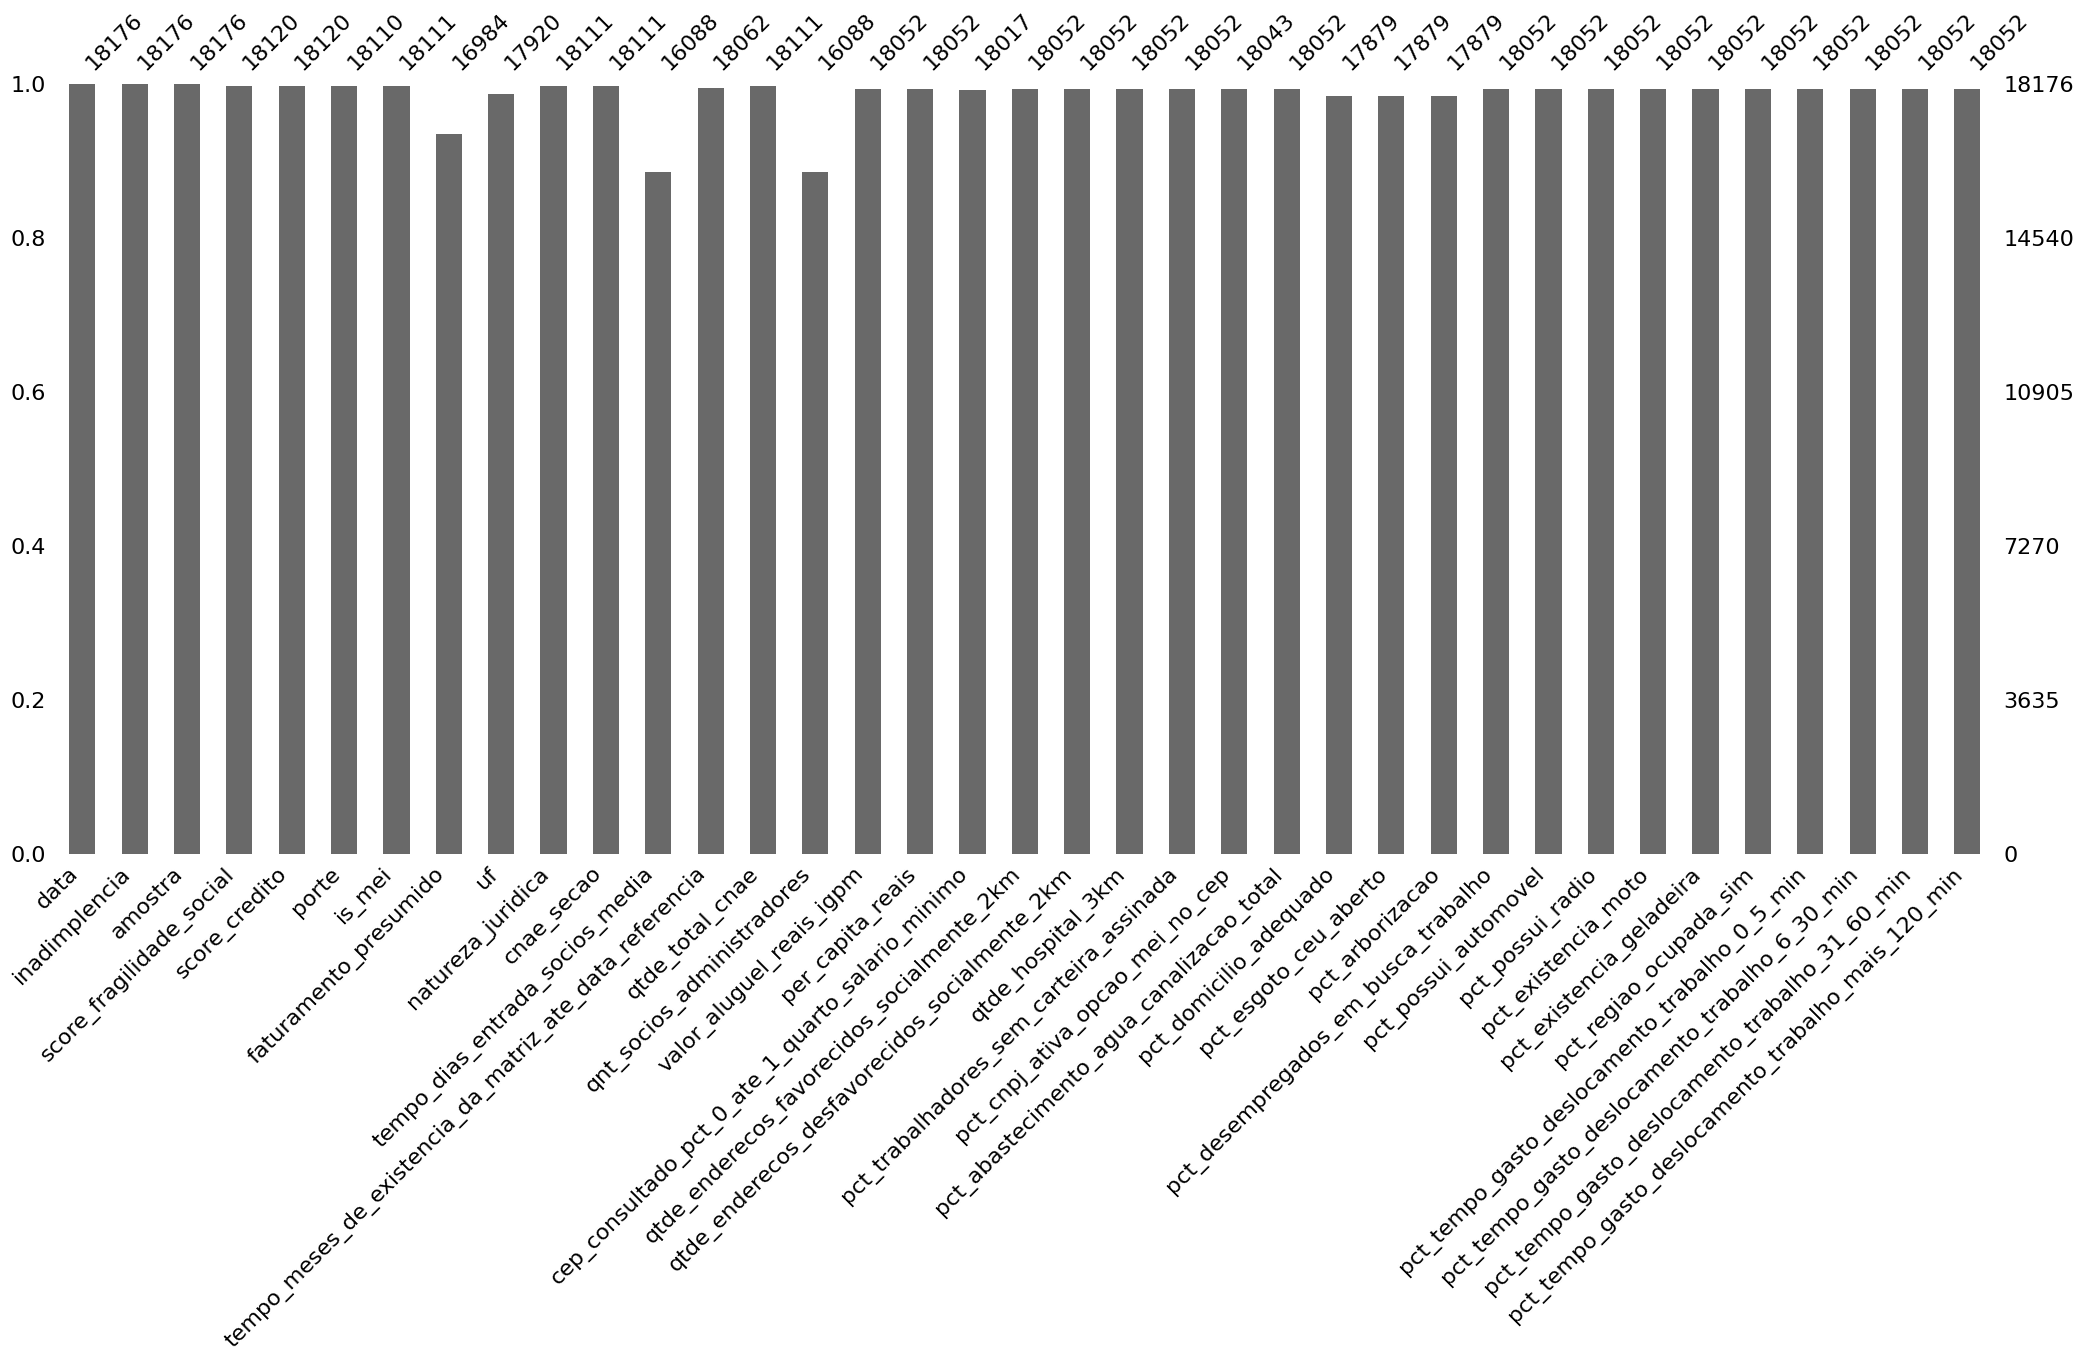

In [7]:
msno.bar(application_df)
plt.show()

# Salvando a base em CSV

In [11]:
application_df = application_df.drop_duplicates()

application_df.to_csv(
    r"G:\Meu Drive\Dissertacao\Data\Processado\StepWise Application Data Processado.csv",
    index = False
)